In [ ]:
PART I: 1. 

In [37]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [37]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [38]:
from nltk.stem import WordNetLemmatizer

In [39]:
import nltk

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\re99n\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
import os

In [42]:
import string

In [43]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

In [44]:
# Downloading necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\re99n\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\re99n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
#folder containing my text files
folder_path = "C:/Users/re99n/OneDrive/Desktop/SEMESTER 2A/Analysing Data/Assignment1/Part_I_1-2"

In [55]:
# Prepare stopwords
# Loading default stopwords & adding more custom stopwords
default_stopwords = set(stopwords.words('english'))
custom_stopwords = {
    "would", "could", "should", "also", "many", "much", "every", "may", 
    "one", "two", "three", "like", "get", "make", "go", "come", "know", 
    "see", "look", "use", "need", "say", "take", "thing", "really"
}

# Combine both stopword sets
stop_words = default_stopwords.union(custom_stopwords)

In [56]:
# Store word frequencies
word_frequencies = {}
total_counter = Counter()

In [57]:
# Read and process all .txt files
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Remove punctuation before tokenization
        import re
        text = re.sub(r"[^\w\s]", "", text)  # Removes all punctuation
        
        words = [word.lower() for word in word_tokenize(text)
            if word.lower() not in stop_words
        ]
        word_frequencies[filename] = Counter(words)
        total_counter.update(words)  # Update total_counter with valid words

In [58]:
# Function to plot word frequency
def plot_top_words(counter, title):
    words, counts = zip(*counter.most_common(25))
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

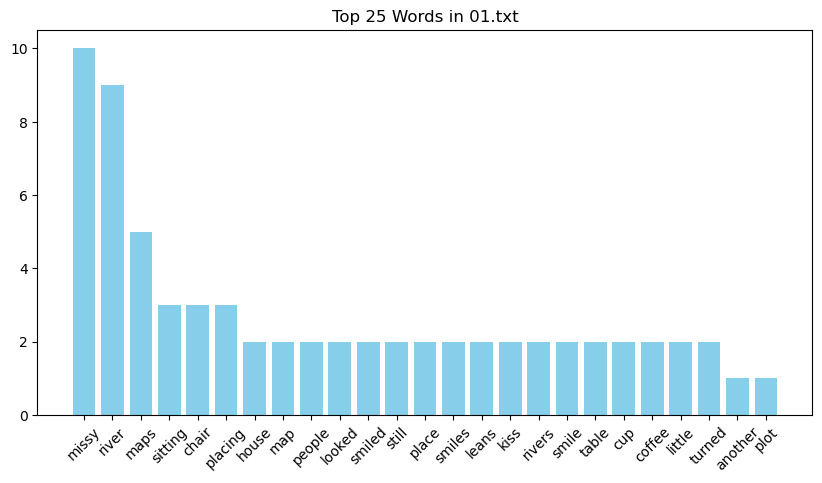

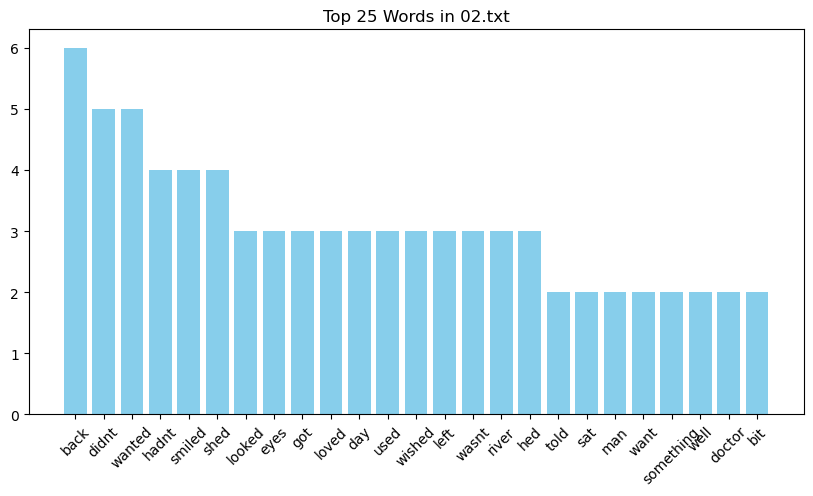

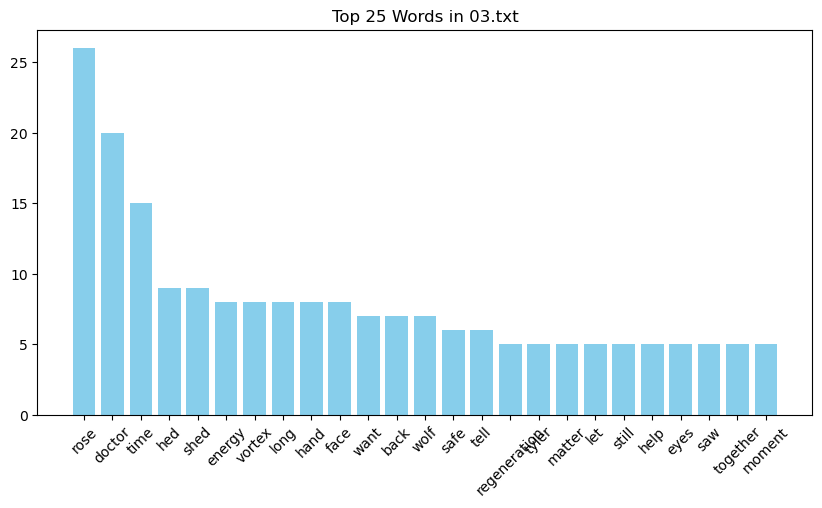

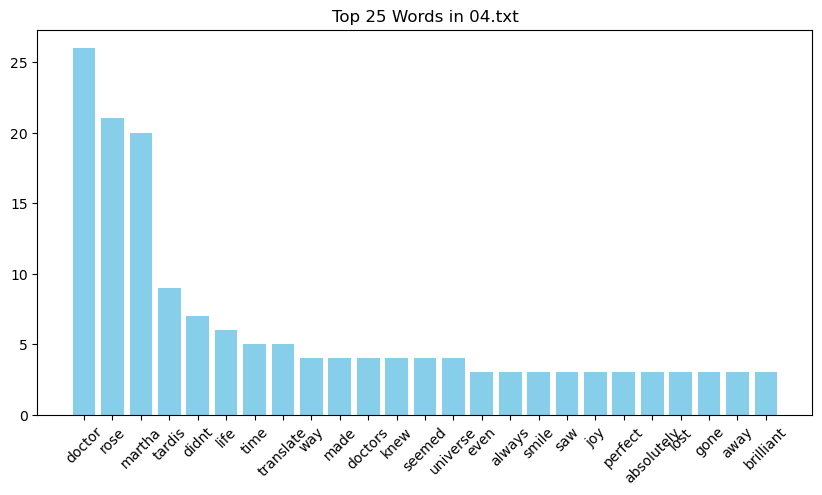

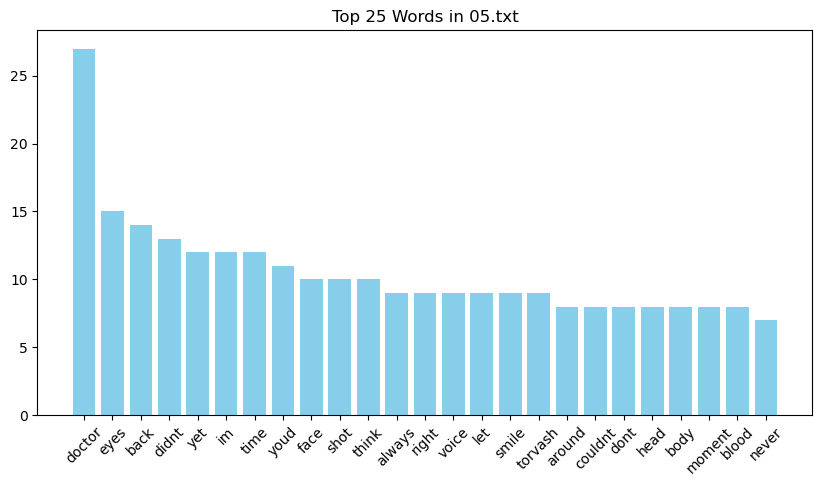

In [59]:
# Plot per file
for filename, counter in word_frequencies.items():
    plot_top_words(counter, f"Top 25 Words in {filename}")

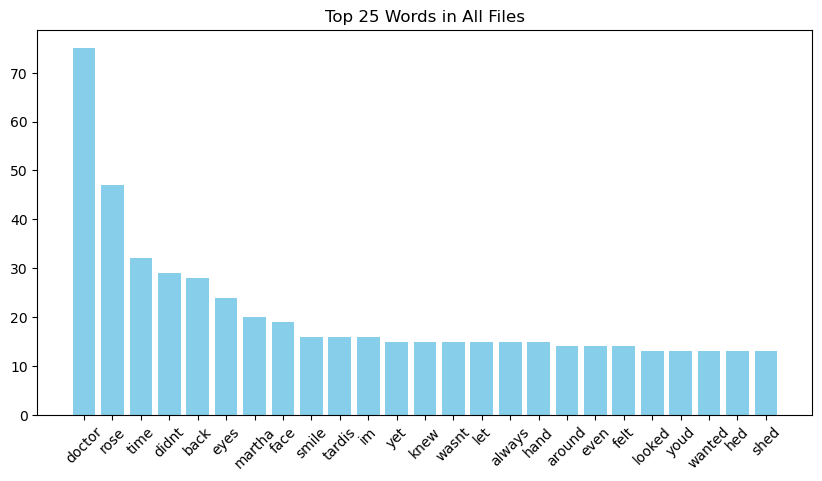

In [60]:
# Plot total frequency across all files
plot_top_words(total_counter, "Top 25 Words in All Files")

In [61]:
# Function to print word frequencies per file in a structured format
def print_word_frequencies_per_file(word_frequencies, label):
    print(f"\n{label} - Word Frequencies Per File:")
    print("-" * 50)
    for filename, counter in word_frequencies.items():
        print(f"\n{filename}:")
        print("-" * 50)
        for word, count in counter.most_common(10):  # Print top 10 words per file
            print(f"{word:<20} {count}")
        print("-" * 50)

# Function to print total word frequency neatly
def print_total_word_frequency(counter, label):
    print(f"\n{label} - Total Word Frequency:")
    print("-" * 50)
    for word, count in counter.most_common(25):  # Print top 25 words in total
        print(f"{word:<20} {count}")
    print("-" * 50)

# Print statistics for word frequencies per file
print_word_frequencies_per_file(word_frequencies, "Word Frequency Per File")

# Print statistics for total word frequency across all files
print_total_word_frequency(total_counter, "Total Word Frequency")


Word Frequency Per File - Word Frequencies Per File:
--------------------------------------------------

01.txt:
--------------------------------------------------
missy                10
river                9
maps                 5
sitting              3
chair                3
placing              3
house                2
map                  2
people               2
looked               2
--------------------------------------------------

02.txt:
--------------------------------------------------
back                 6
didnt                5
wanted               5
hadnt                4
smiled               4
shed                 4
looked               3
eyes                 3
got                  3
loved                3
--------------------------------------------------

03.txt:
--------------------------------------------------
rose                 26
doctor               20
time                 15
hed                  9
shed                 9
energy               8
vortex     

In [ ]:
PART I: 2.

In [62]:
from nltk.stem import SnowballStemmer, PorterStemmer, LancasterStemmer

In [63]:
# Loading default stopwords & adding more custom stopwords
default_stopwords = set(stopwords.words('english'))
custom_stopwords = {
    "would", "could", "should", "also", "many", "much", "every", "may", 
    "one", "two", "three", "like", "get", "make", "go", "come", "know", 
    "see", "look", "use", "need", "say", "take", "thing", "really"
}

# Combine both stopword sets
stop_words = default_stopwords.union(custom_stopwords)

In [64]:
# Initialize stemmers
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

In [65]:
# Function to perform stemming
def stem_words(words, stemmer):
    return [stemmer.stem(word) for word in words]

# Store word frequencies for unstemmed, Porter-stemmed, and Lancaster-stemmed
word_frequencies_unstemmed = {}
word_frequencies_porter = {}
word_frequencies_lancaster = {}
total_counter_unstemmed = Counter()
total_counter_porter = Counter()
total_counter_lancaster = Counter()

folder_path = "C:/Users/re99n/OneDrive/Desktop/SEMESTER 2A/Analysing Data/Assignment1/Part_I_1-2"

In [66]:
# Read and process all .txt files
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Remove punctuation before tokenization
        text = re.sub(r"[^\w\s]", "", text)  # Removes ALL punctuation

        # Tokenize words and remove stopwords, only keeping alphabetic words
        words = [
            word.lower() for word in word_tokenize(text)
            if word.lower() not in stop_words and word.isalpha()
        ]
        
        # Update word frequencies for unstemmed words
        word_frequencies_unstemmed[filename] = Counter(words)
        total_counter_unstemmed.update(words)

        # Perform stemming using Porter and Lancaster, and update frequencies
        words_porter = stem_words(words, porter_stemmer)
        word_frequencies_porter[filename] = Counter(words_porter)
        total_counter_porter.update(words_porter)

        words_lancaster = stem_words(words, lancaster_stemmer)
        word_frequencies_lancaster[filename] = Counter(words_lancaster)
        total_counter_lancaster.update(words_lancaster)

In [67]:
# Function to plot word frequency
def plot_top_words(counter, title):
    words, counts = zip(*counter.most_common(25))
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

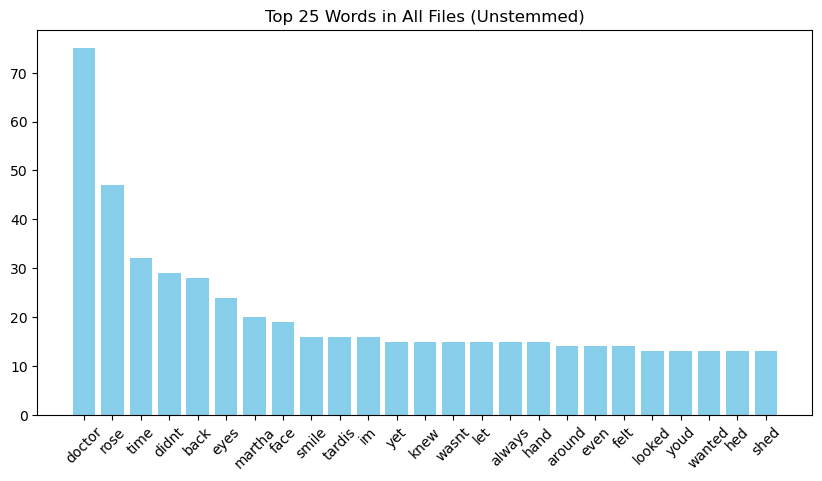

In [68]:
# Plot for unstemmed words
plot_top_words(total_counter_unstemmed, "Top 25 Words in All Files (Unstemmed)")

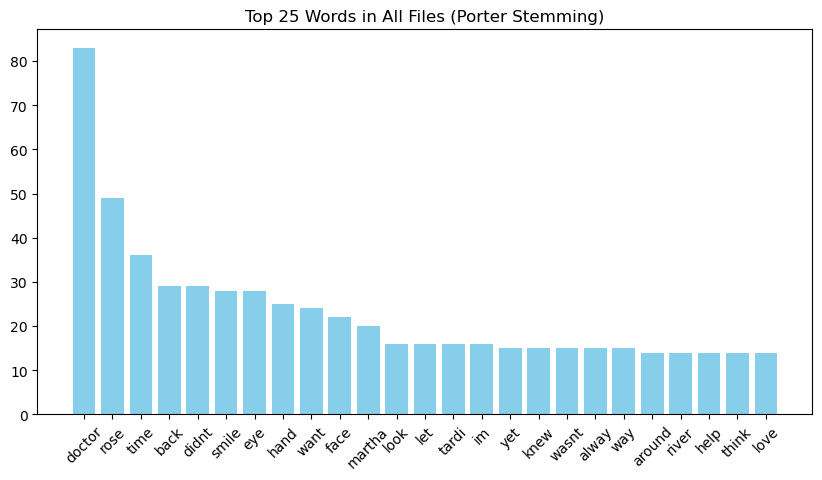

In [69]:
# Plot for Porter-stemmed words
plot_top_words(total_counter_porter, "Top 25 Words in All Files (Porter Stemming)")

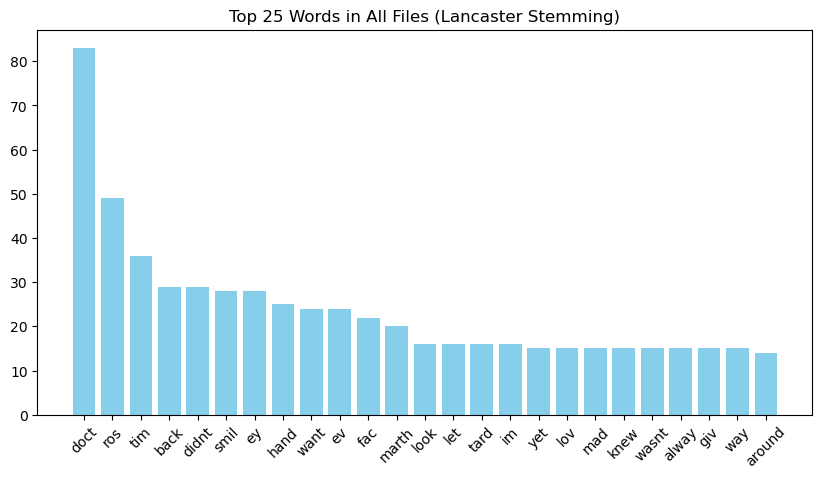

In [71]:
# Plot for Lancaster-stemmed words
plot_top_words(total_counter_lancaster, "Top 25 Words in All Files (Lancaster Stemming)")

In [72]:
# Function to print statistics neatly
def print_word_statistics(counter, label):
    print(f"\n{label} - Top 25 Words:")
    print("-" * 50)
    for word, count in counter.most_common(25):
        print(f"{word:<20} {count}")
    print("-" * 50)

# Print statistics for comparison
print_word_statistics(total_counter_unstemmed, "Total Word Frequency (Unstemmed)")
print_word_statistics(total_counter_porter, "Total Word Frequency (Porter Stemming)")
print_word_statistics(total_counter_lancaster, "Total Word Frequency (Lancaster Stemming)")


Total Word Frequency (Unstemmed) - Top 25 Words:
--------------------------------------------------
doctor               75
rose                 47
time                 32
didnt                29
back                 28
eyes                 24
martha               20
face                 19
smile                16
tardis               16
im                   16
yet                  15
knew                 15
wasnt                15
let                  15
always               15
hand                 15
around               14
even                 14
felt                 14
looked               13
youd                 13
wanted               13
hed                  13
shed                 13
--------------------------------------------------

Total Word Frequency (Porter Stemming) - Top 25 Words:
--------------------------------------------------
doctor               83
rose                 49
time                 36
back                 29
didnt                29
smile                

In [ ]:
PART II: 3. 

In [32]:
pip install spacy

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.15.1-py3-none-any.whl.metadata (15 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached cloudpathlib-0.20.0-py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ----------------- ---------------------- 5.2/11.8 MB 31.9 MB/s eta 0:00:01
   -------------------------------- ------- 9.7/11.8 MB 25.2 MB/s eta 0:00:01
   ---------------------------------

In [2]:
!python -m spacy download en_core_web_sm
!python -m spacy download nl_core_news_sm
!python -m spacy download de_core_news_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -------------- ------------------------- 4.7/12.8 MB 31.6 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 35.8 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 30.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------------- -------------------------- 4.2/12.8 MB 31.5 MB/s eta 0:00:01
     ----------------------------------- --- 11.8/12.8 MB 33.5 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 27.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('nl_core_news_sm')
     ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
     --------- ------------------------------ 3.4/14.6 MB 25.2 MB/s eta 0:00:01
     ------------

In [3]:
import spacy

# Load the appropriate spaCy models for each language
nlp_en = spacy.load("en_core_web_sm")
nlp_nl = spacy.load("nl_core_news_sm")
nlp_de = spacy.load("de_core_news_sm")
from collections import Counter

In [4]:
# Function to process text and return POS tag frequencies
def get_pos_frequencies(text, nlp):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Extract POS tags and count frequencies
    pos_tags = [token.pos_ for token in doc]
    pos_frequencies = Counter(pos_tags)
    
    return pos_frequencies

In [6]:
# Example of how to read the cleaned text files
def read_text_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()
    return text

In [7]:
# Paths to the three cleaned text files
file_path_en = "C:/Users/re99n/OneDrive/Desktop/SEMESTER 2A/Analysing Data/Assignment1/Part_I_3/pg74.txt"
file_path_nl = "C:/Users/re99n/OneDrive/Desktop/SEMESTER 2A/Analysing Data/Assignment1/Part_I_3/pg18381.txt"
file_path_de = "C:/Users/re99n/OneDrive/Desktop/SEMESTER 2A/Analysing Data/Assignment1/Part_I_3/pg30165.txt"

# Read the text files
text_en = read_text_file(file_path_en)
text_nl = read_text_file(file_path_nl)
text_de = read_text_file(file_path_de)

# Get POS tag frequencies for each language
pos_freq_en = get_pos_frequencies(text_en, nlp_en)
pos_freq_nl = get_pos_frequencies(text_nl, nlp_nl)
pos_freq_de = get_pos_frequencies(text_de, nlp_de)

# Print the results (Top 10 POS tags for each language)
def print_pos_frequencies(language, pos_frequencies):
    print(f"\nPOS Tag Frequencies for {language}:")
    print("-" * 50)
    for pos, count in pos_frequencies.most_common(10):  # Top 10 most common POS tags
        print(f"{pos:<10} {count}")
    print("-" * 50)

In [8]:
# Print POS frequencies for each translation
print_pos_frequencies("English", pos_freq_en)
print_pos_frequencies("Dutch", pos_freq_nl)
print_pos_frequencies("German", pos_freq_de)


POS Tag Frequencies for English:
--------------------------------------------------
PUNCT      15821
NOUN       12927
VERB       11752
PRON       10457
ADP        7768
DET        7343
SPACE      6939
ADV        4953
ADJ        4639
AUX        4523
--------------------------------------------------

POS Tag Frequencies for Dutch:
--------------------------------------------------
PUNCT      14247
NOUN       12381
VERB       11865
PRON       10034
ADP        8872
SPACE      7536
DET        7140
ADV        5776
ADJ        5166
PROPN      4320
--------------------------------------------------

POS Tag Frequencies for German:
--------------------------------------------------
PUNCT      18730
NOUN       11299
VERB       9565
ADV        9343
PRON       8795
DET        7486
SPACE      6966
ADP        5353
PROPN      3920
AUX        3760
--------------------------------------------------


In [ ]:
PART II: 1

In [9]:
import spacy
import os

In [10]:
# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

In [35]:
import os
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))

cleaned_texts = {}
folder_path = "C:/Users/re99n/OneDrive/Desktop/SEMESTER 2A/Analysing Data/Assignment1/Part_I_1-2"

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Remove punctuation and tokenize
        text = re.sub(r"[^\w\s]", "", text)
        words = [
            word.lower() for word in word_tokenize(text)
            if word.lower() not in stop_words and word.isalpha()
        ]
        
        # Store the cleaned text in dictionary
        cleaned_texts[filename] = " ".join(words)

#Print the first few words of one file
for filename, content in cleaned_texts.items():
    print(f"\n{filename}: {content[:200]}...")  #Show first 200 characters

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\re99n\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\re99n\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.



01.txt: another plot missy sitting chair house maps papers spread around normally planning mental river suggested physical map refer helpful river walked bedroom people house really good clothes wearing tshir...

02.txt: youd looked eyes told look eyes tell come far sat bed thinking got husband man occasionally women loved also made want slap hadnt known thought back something told father well doctor knowing killed to...

03.txt: want safe beegabbagabba want safe doctor even regeneration energy continues build ethereal golden gleam swirled along flow veins feeling familiar yet never welcome never without pain rose tyler voice ...

04.txt: even language flowers dead roses always mean love aubreyplvr smile lit life every single time saw like hearts exploded joy smile way teeth showed tongue poked perfect everything absolutely perfect doc...

05.txt: wwtdd would doctor aboutcustardcreams doctor youd tell idiot always managed whats right beyond easier put blame fault least tiny bit found 

In [24]:
#NAMED ENTITY RECOGNITION MANUALLY

# Manually selected sentences from each text file
manual_sentences = {
    "01.txt": ["Missy was sitting on a chair in a house, maps and papers spread around, normally her planning was mental, but River had suggested a physical map to refer to and it was helpful.", 
               "River walked out of the bedroom.'The people who own this house really have no good clothes.'"
              ],
    "02.txt": ["she thought back to something she once told her father, well, the Doctor not knowing who she was had killed her.",
               "When she got into the garden she stood, shocked, a man wearing a ridiculous bow tie, with an even more ridiculous hat."
              ],
    "03.txt": ["Rose blinked back at him, confused. He was laughing, but something wasn't right and Rose could feel it.",
               "Rassilon, how he loved to say her name. 'I was going to take you to so many places. Barcelona. Not the city Barcelona, the planet Barcelona. You'd love it.'"
              ],
    "04.txt": ["The Doctor had no clue how he could live life again without Rose, he genuinely believed that he, that this body, was made for her.",
               "Martha, such a lovely and brilliant woman, is doing her best for him, he probably could do better, but he has to do better for her."
              ],
    "05.txt": ["You have always been a bit feisty, growing up. But you’d not consider yourself a bad person. The Doctor was the mediator, the one good with words, while you were the brawn. And for a while it worked out quite fine.",
               "She looked ethereal, like an absolute vision after days in a desert. With her hand stretched out, sonic pointed at him, he hit him, one strike to his hand caused him to drop the remote he was holding to control the electricity surging from the cuffs."
              ]
}

In [26]:
# Manually Annotate Entities in Each Sentence
manual_annotations = {
    "01.txt": [
        ("Missy", "PERSON"),
        ("River", "PERSON"),
        ("house", "LOC"),
        ("maps", "MISC"),
        ("papers", "MISC")
    ],
    "02.txt": [
        ("father", "PERSON"),
        ("Doctor", "PERSON"),
        ("garden", "LOC"),
        ("man", "PERSON"),
        ("bow tie", "MISC"),
        ("hat", "MISC")
    ],
    "03.txt": [
        ("Rose", "PERSON"),
        ("Rassilon", "PERSON"),
        ("Barcelona", "GPE"),
        ("Barcelona", "GPE")
    ],
    "04.txt": [
        ("Doctor", "PERSON"),
        ("Rose", "PERSON"),
        ("body", "MISC"),
        ("Martha", "PERSON"),
        ("woman", "MISC")
    ],
    "05.txt": [
        ("Doctor", "PERSON"),
        ("sonic", "MISC"),
        ("hand", "MISC"),
        ("remote", "MISC"),
        ("electricity", "MISC"),
        ("cuffs", "MISC")
    ]
}

In [28]:
#APPLY NER TO SELECTED SENTENCES

# Dictionary to store spaCy’s predictions for the selected sentences
spacy_predictions = {}

# Loop through each file and its list of sentences
for filename, sentences in manual_sentences.items():
    # List to store entities for the current file
    file_entities = []
    
    # Process each sentence in the list of sentences for the current file
    for sentence in sentences:
        doc = nlp(sentence)  # Process sentence with spaCy

        # Extract named entities
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        
        # Add the entities to the list for this file
        file_entities.extend(entities)
    
    # Store the extracted entities for the current file
    spacy_predictions[filename] = file_entities

# Print spaCy's predictions for comparison
for filename, entities in spacy_predictions.items():
    print(f"\nSpaCy Predictions for {filename}:")
    for entity, label in entities:
        print(f"{entity} - {label}")


SpaCy Predictions for 01.txt:
Missy - PERSON
River - LOC

SpaCy Predictions for 02.txt:

SpaCy Predictions for 03.txt:
Rose - PERSON
Barcelona - GPE
Barcelona - GPE
Barcelona - GPE

SpaCy Predictions for 04.txt:
Rose - PERSON
Martha - PERSON

SpaCy Predictions for 05.txt:
one - CARDINAL
days - DATE
one - CARDINAL


In [34]:
#COMPARE MANUAL VS. AUTOMATIC NER

from sklearn.metrics import precision_recall_fscore_support

# Function to evaluate NER performance
def evaluate_ner(true_entities, pred_entities):
    # Extract the entity types from the true and predicted entities
    true_labels = [label for _, label in true_entities]
    pred_labels = [label for _, label in pred_entities]
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='micro', zero_division=0)
    return precision, recall, f1

# Dictionary to store spaCy’s predictions for the selected sentences
spacy_predictions = {}

# Process spaCy predictions for all sentences in the manual_sentences
for filename, sentences in manual_sentences.items():
    spacy_predictions[filename] = []
    for sentence in sentences:
        doc = nlp(sentence)  # Process sentence with spaCy

        # Extract named entities
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        spacy_predictions[filename].append(entities)

# Compare manual annotations and spaCy predictions
for filename, true_entities_list in manual_annotations.items():
    if filename in spacy_predictions:
        pred_entities_list = spacy_predictions[filename]
        
        # Handle mismatch in number of sentences: if the number of true entities doesn't match predicted entities
        if len(true_entities_list) != len(pred_entities_list):
            print(f"\nWarning: Mismatch in the number of sentences for {filename}.")
            print(f"True entities count: {len(true_entities_list)} | Predicted entities count: {len(pred_entities_list)}")
            continue
        
        # Iterate through each sentence and compare entities
        for true_entities, pred_entities in zip(true_entities_list, pred_entities_list):
            if true_entities and pred_entities:
                precision, recall, f1 = evaluate_ner(true_entities, pred_entities)
                print(f"\nEvaluation for {filename}:")
                print(f"Precision: {precision:.2f}")
                print(f"Recall: {recall:.2f}")
                print(f"F1 Score: {f1:.2f}")
            else:
                print(f"\nNo entities found in either true or predicted for sentence in {filename}.")



True entities count: 5 | Predicted entities count: 2

True entities count: 6 | Predicted entities count: 2

True entities count: 4 | Predicted entities count: 2

True entities count: 5 | Predicted entities count: 2

True entities count: 6 | Predicted entities count: 2
